<a href="https://colab.research.google.com/github/Dashnyam7/Deep-Learning/blob/main/What_is_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Neural Network?

A neural network is a mathematical model that mimics the information transmission of the brain (nervous system).
Nerve cells (neurons) fire (activate) when the input stimulus exceeds the threshold, generate action potentials, and transmit information to other cells.
Information is conveyed by this firing chain, and calculation is realized. The process of changing the strength of connections between neurons is called learning.

On the other hand, neural networks map input vectors to another vector space by means of weights (connection weights) and activation functions.
This is done in a chain to extract the information. This process of emphasizing the weights is called learning.

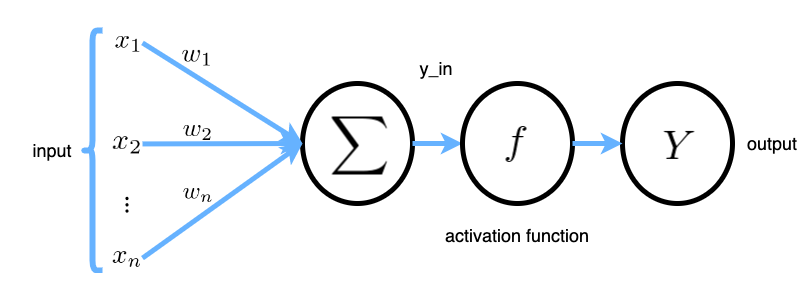

### MNIST dataset

Here, to explain the neural network, we will use a data set called MNIST, which consists of image data of handwritten characters.

For example, in addition to a normal neural network that calculates prediction results from one row of data (three-layer shallow neural network (Network training) as shown in the image below), prediction results from two-dimensional data such as images There are convolutional neural networks (CNNs) that compute .

Originally, the image given as input is two-dimensional data, but by interpreting it as one-dimensional input data by arranging each element in one line, a normal neural network is created.

In this text, we will learn shallow neural networks (NN), deep neural networks (DNN), and convolutional neural networks (CNN) in that order.
In addition, we will use the MNIST dataset as an example to explain all neural networks.

Originally, CNN-based methods are often used for image data, but in order to facilitate understanding, this text uses the MNIST dataset to unify NN/DNN/CNN. We will implement it.

### Preparing the dataset

A handwritten character data set (MNIST data set) is input to a neural network, and multi-class classification of 0 to 9 (numbers) is performed.

Idea: (y_train: About correct label)
When dividing into two classes:
Use the correct label corresponding to one sample as a scalar (int type) such as 0 or 1 for learning.
When dividing into multiple classes:
When an outcome label corresponding to one sample is given, it is converted into a one-hot vector with the length of the class and used for learning.

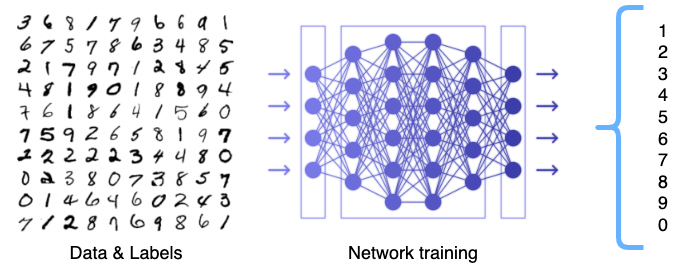

# Neural Network Structure

### Structure

A neural network, as the name suggests, is an algorithm that mimics the human nervous system.

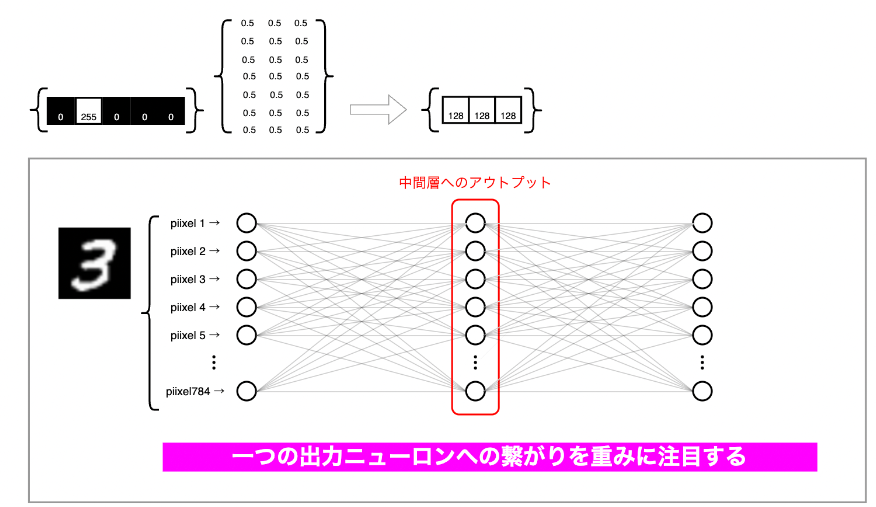

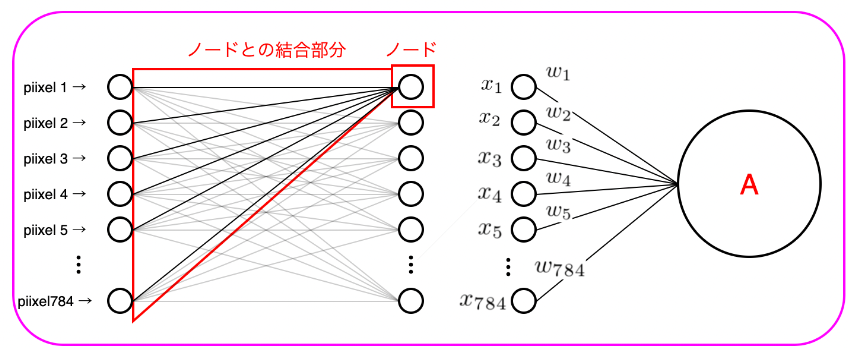

Each ○ in the above image is called a node, and the nodes constitute layers. The layer configuration consists of one input layer and one output layer, and any number of intermediate layers can be added (one intermediate layer for images).

In addition, each node is connected to all nodes in the next layer. This is why I use the word "dense" in other explanations and tutorials.

As shown in the above image, the values ​​of smoothed MNIST data (28 pixels x 28 pixels = 784) are input to the input layer as input values, pass through the intermediate layers through various calculations, and go to the output layer. will output the predicted value.
As for the number of nodes in the output layer, since MNIST data is classified into 10 classes (handwritten data from 0 to 9), there are 10 nodes. node as a class.

For example, if each output of the output layer node is as follows, the maximum value is 0.87, which means that the input image is the "character 5". (In this case, the handwritten character in the above figure is 3, so we judge that the prediction result is different.)

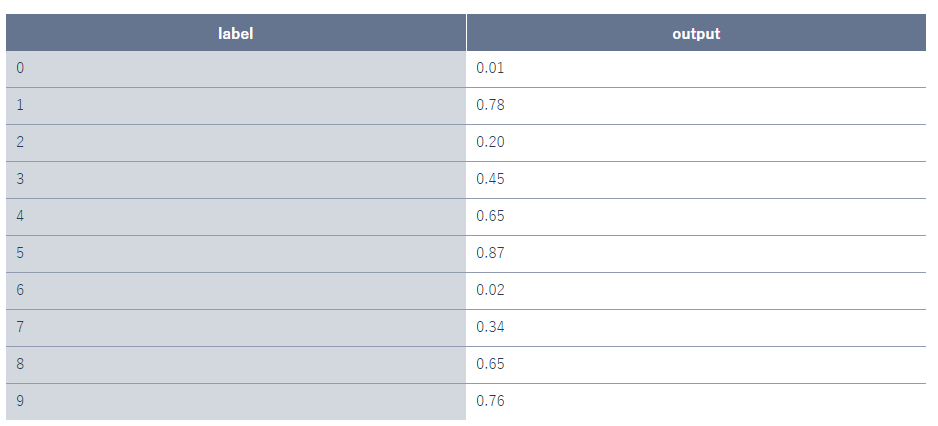

### Reasoning and learning

Inference processing is called forward propagation .

In forward propagation, the input data goes forward through the network (from left to right here) as the word forward.
Each hidden layer (hidden layer) then receives input data, processes it according to its activation function, and passes it on to the next layer.

At this time, forward propagation sequentially calculates and saves intermediate variables in the computation graph defined by the neural network, and proceeds from the input layer to the output layer.

Next, the learning process is called back propagation .

Backpropagation is a method of computing the gradient of a neural network's parameters.
Specifically, it follows the chain rule of calculus and traces the network backwards from the output layer to the input layer.
This algorithm saves the intermediate variables (partial derivatives) needed to compute the gradients with respect to the parameters.

Backpropagation sequentially computes and stores gradients of intermediate variables and parameters in a neural network in reverse order.

The details of each process will be introduced in the following text.
Let's just get an overview here.

## Overview of Scratch Code

In [ ]:
class ScratchSimpleNeuralNetrowkClassifier():
    def __init__(self,batch_size = 20,n_features = 784,n_nodes1 = 400,n_nodes2 = 200,n_output = 10,sigma = 0.02,lr = 0.01,epoch = 10, verbose=True):
        self.verbose = verbose
        self.batch_size = batch_size
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2 
        self.n_output = n_output
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch
        self.loss_train = []
        self.loss_val = []
   
    def fit(self, X, y, X_val=None, y_val=None):
        pass
    
    def forward(self, X):
        pass
    
    def backward(self, X, y):
        pass
            
    def tanh_function(self, A):
        pass
    
    def softmax(self, A):
        pass

    def cross_entropy_error(self, y, Z):
        pass
        
    def predict(self, X):
        pass

# Computational Introduction

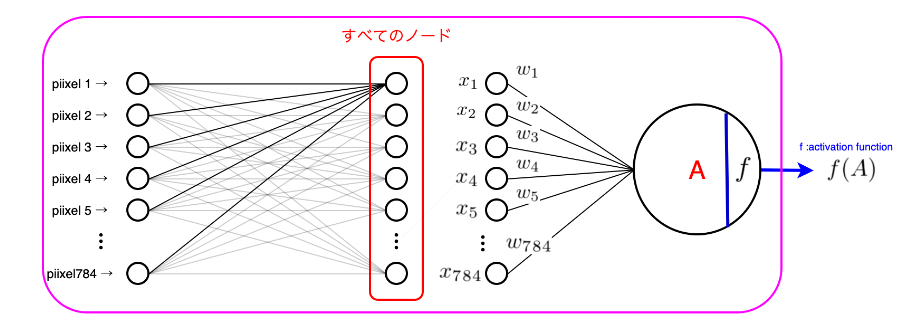

As shown in the image above, the input layer contains 784 MNIST data as is.

Each node in the middle layer receives the total value (A) of the values ​​multiplied by 784 data as the input value of each node. Then, the value (f(A)) passing the total value (A) through the function (f) becomes the output value of each node. Similarly for multiple hidden layers, the output from the previous hidden layer is taken as input by the next hidden layer.

The output layer performs the same processing as the intermediate layer.

### Bias

For each hidden layer, we need to add a node called the bias, which acts as a constant term in linear regression.

# Activation Function

The activation function is the function f introduced earlier.

The purpose of the activation function is to introduce nonlinearity into the network. In fact, without an activation function, we can only solve linearly separable problems.

There are various types of activation functions

### identity function

f
(
x
)
=
x

In [1]:
def identity_function(self,X):
    return X

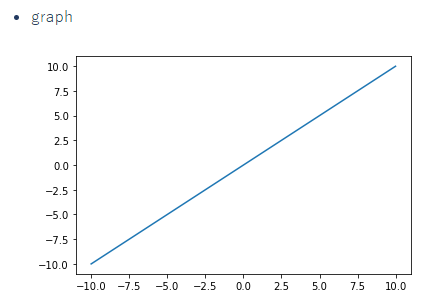

### step function

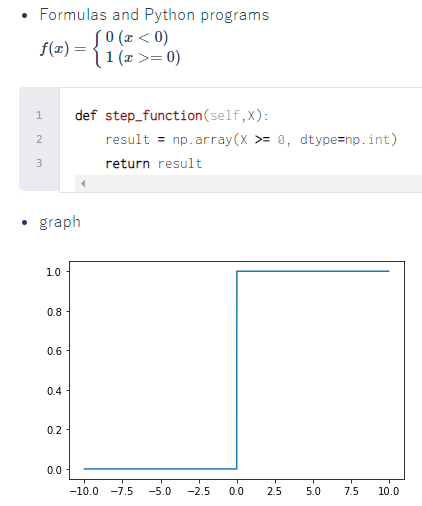

In [ ]:
def step_function(self,X):
    result = np.array(X >= 0, dtype=np.int)
    return result

### relu function (relu)

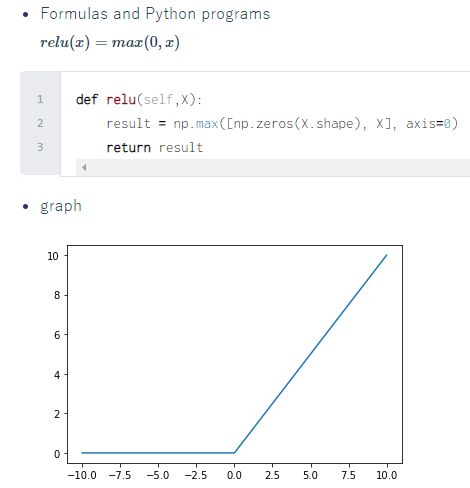

In [ ]:
def relu(self,X):
    result = np.max([np.zeros(X.shape), X], axis=0)   
    return result

### softmax function

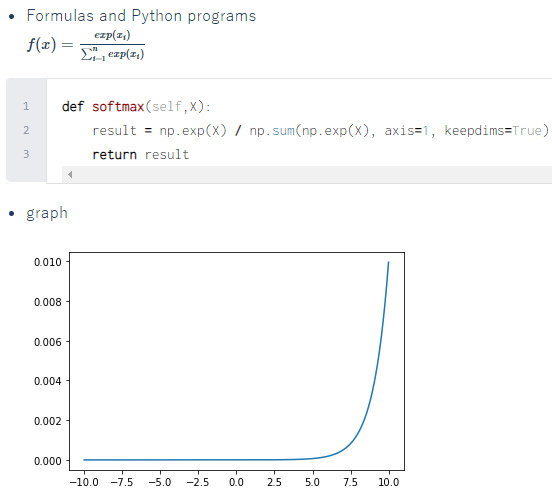

In [ ]:
def softmax(self,X):
    result = np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)
    return result

### tanh function (hyperbolic tangent)

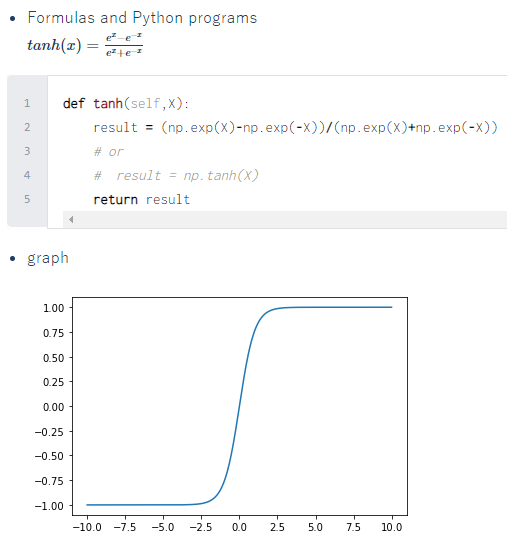

In [ ]:
def tanh(self,X):
    result = (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
    # or
    #  result = np.tanh(X)
    return result

# Computational graph

Computational graph: a visualization of a computational process represented by multiple nodes and edges

Chain rule: the derivative of a composite function is expressed by the derivative of each function that composes the composite function

Suppose we have the following two expressions:

z
=
$t^2$

t
=
x
+
y
This can be represented using a calculation graph as follows.

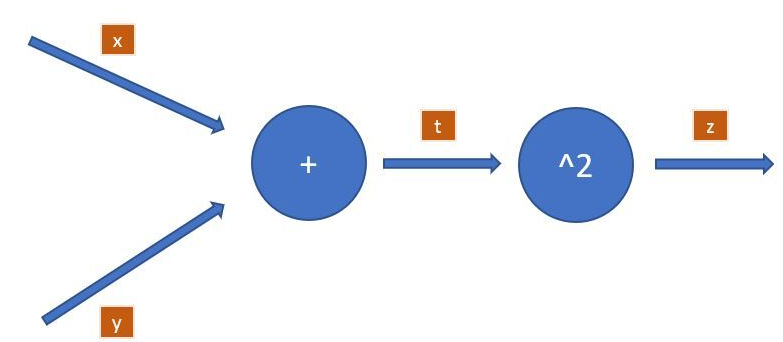

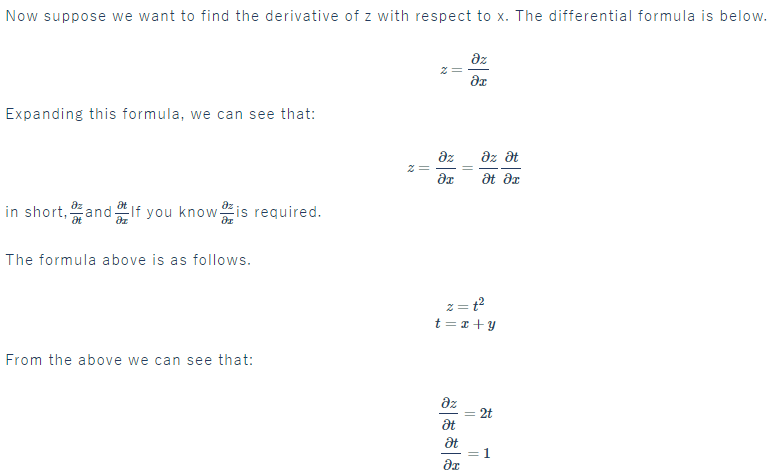

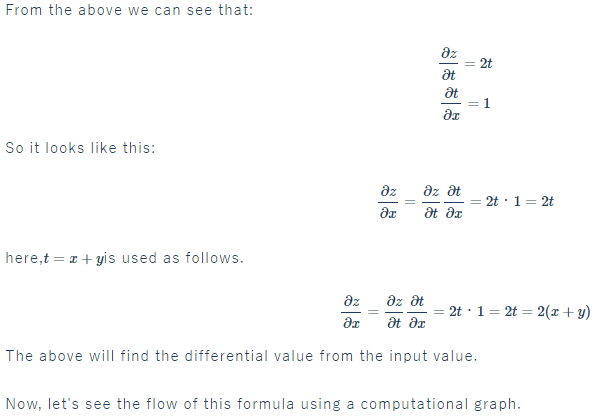

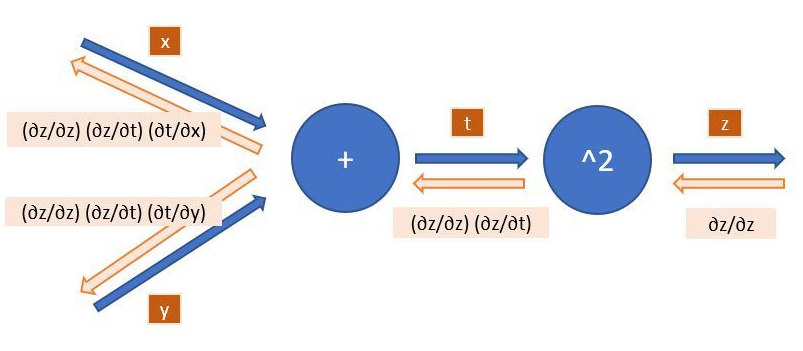

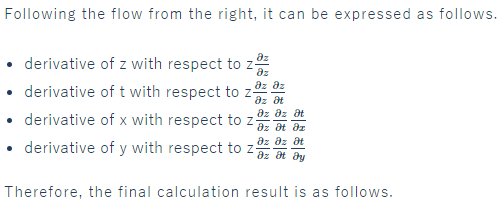

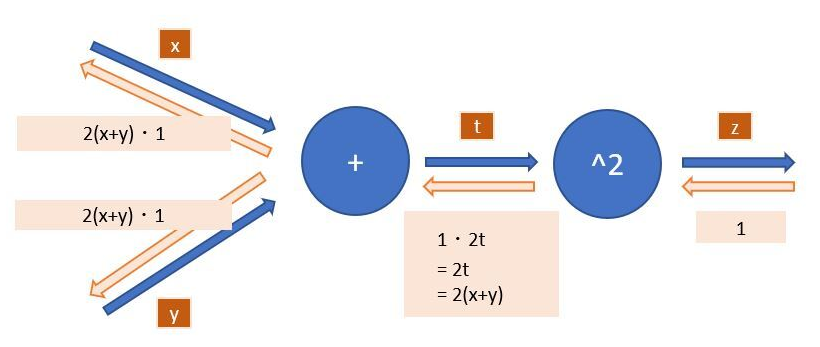

How this computational graph is useful in neural networks is that the blue arrows represent forward propagation and the orange arrows represent backpropagation, so we use the computational graph to compute the neural network. You can.

### Calculation graph for matrix calculation

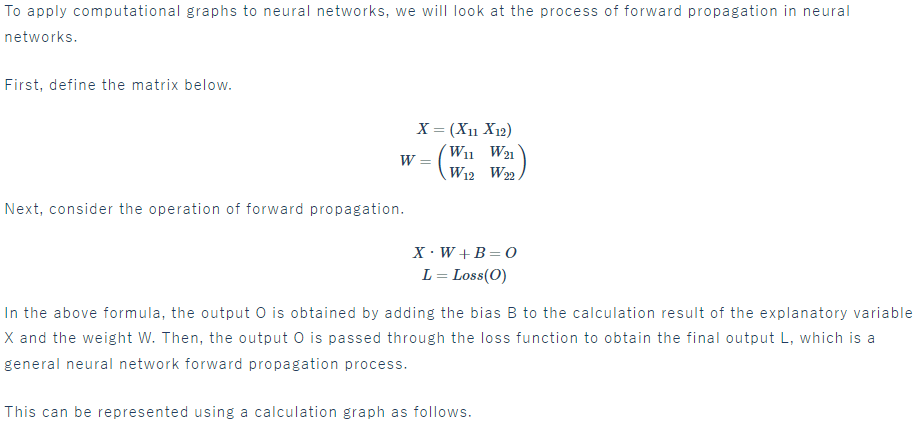

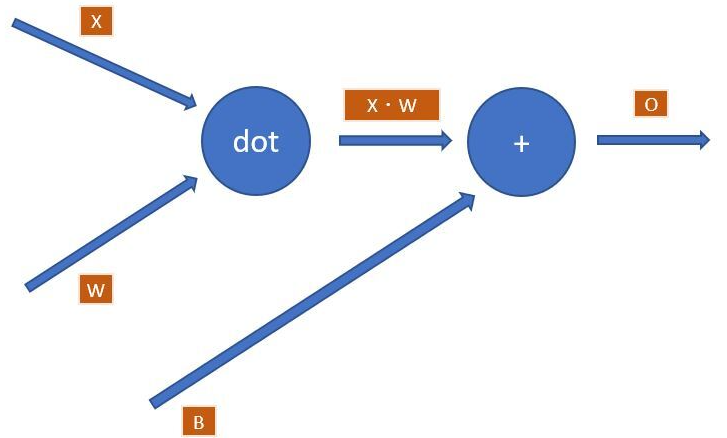

To compute the gradient of W and B, the derivative of W with respect to L
∂
O
∂
W
, the derivative of B with respect to L
∂
O
∂
B
must be sought for each.

Here, the addition node passes the backpropagated value as it is, so the backpropagation is as follows. It is the derivative of the loss function output L with respect to the output O.

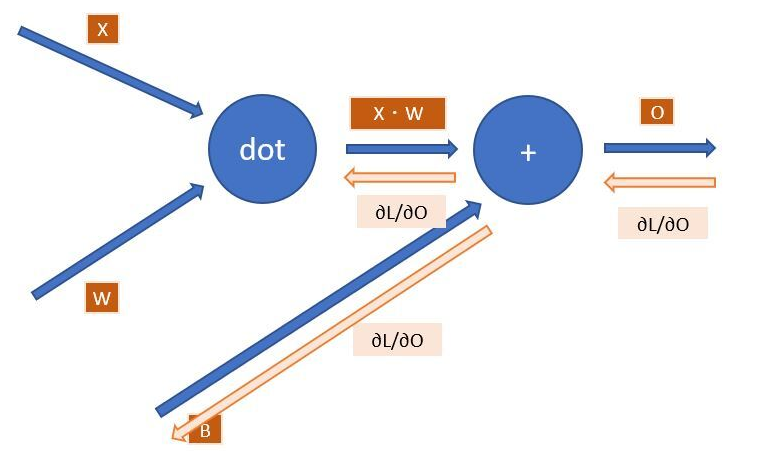

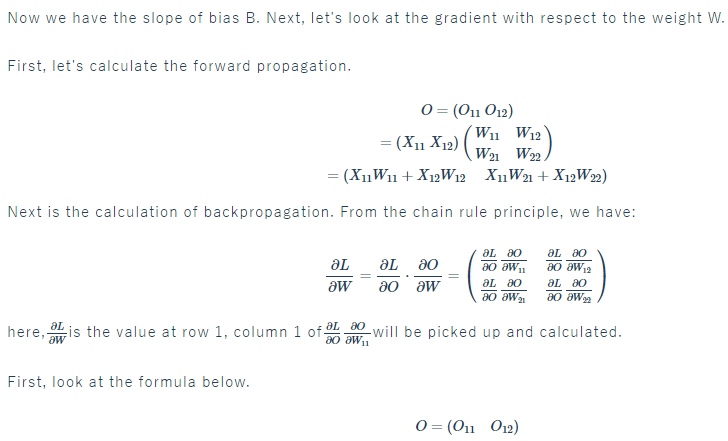

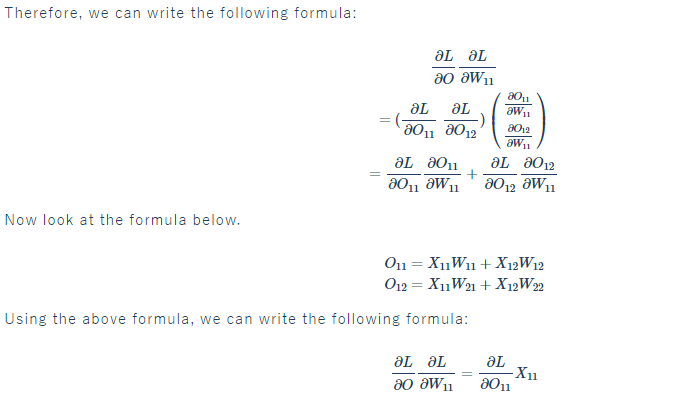

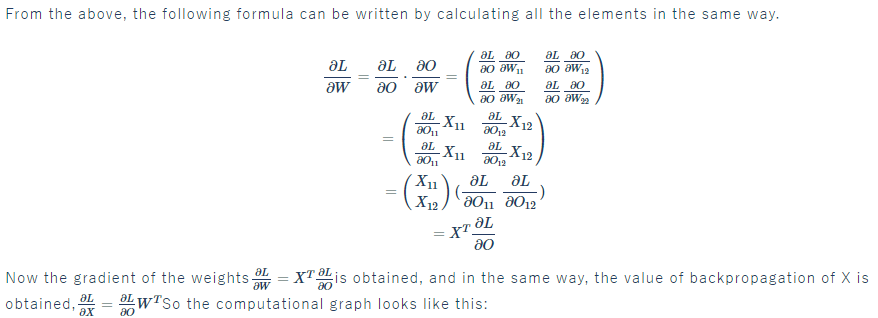

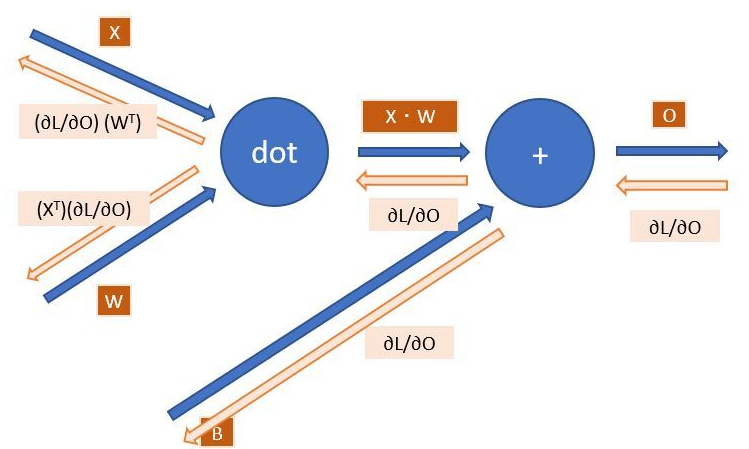